In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset on the city column 
city_rides = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
city_rides.head(15)



,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

In [3]:
#Filter the city_rides tables by the type into 3 tables

Urban_city_rides = city_rides.loc[city_rides["type"]== "Urban", :]
Suburban_city_rides = city_rides.loc[city_rides["type"]== "Suburban", :]
Rural_city_rides = city_rides.loc[city_rides["type"]== "Rural", :]

#Filter city_data into 3 tables, drop the type, join to the groupby tables
Urban_city_driver = city_data.loc[city_data["type"]== "Urban", :]
Urban_city_driver = Urban_city_driver.drop (columns = ["type"])

Suburban_city_driver = city_data.loc[city_data["type"]== "Suburban", :]
Suburban_city_driver = Suburban_city_driver.drop (columns = ["type"])

Rural_city_driver = city_data.loc[city_data["type"]== "Rural", :]
Rural_city_driver = Rural_city_driver.drop (columns = ["type"])


# Do a groupby on each table to get mean & count  
#Urban Groupby
Urban_mean = Urban_city_rides.groupby('city').mean()
Urban_totals =Urban_city_rides.groupby('city').count()
merged_Urban = pd.merge(Urban_mean, Urban_city_driver, on="city" )

#Suburban Groupby
Suburban_mean = Suburban_city_rides.groupby('city').mean()
Suburban_totals =Suburban_city_rides.groupby('city').count()
merged_Suburban = pd.merge(Suburban_mean, Suburban_city_driver, on="city" )

#Rural Groupby
Rural_mean = Rural_city_rides.groupby('city').mean()
Rural_totals = Rural_city_rides.groupby('city').count()
merged_Rural = pd.merge(Rural_mean, Rural_city_driver, on="city" )



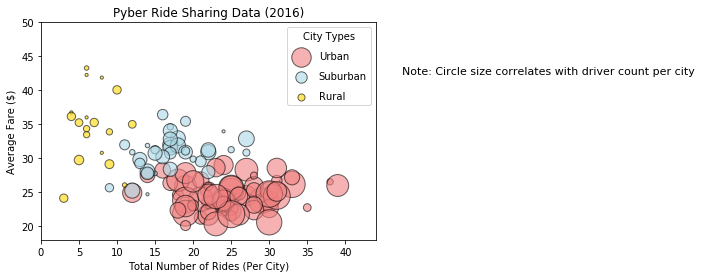

In [4]:

#Populate the x list with the total rides column and the y list with the avg fare column
#Urban x y
x_totalrides_urban = Urban_totals["ride_id"].tolist()
y_avgfare_urban =Urban_mean["fare"].tolist()
s_numdrivers_urban = merged_Urban["driver_count_x"].tolist()
scaled_urban_drivers = [i*10 for i in s_numdrivers_urban]


#Suburban x y 
x_totalrides_suburban = Suburban_totals["ride_id"].tolist()
y_avgfare_suburban = Suburban_mean["fare"].tolist()
s_numdrivers_suburban = merged_Suburban["driver_count_x"].tolist()
scaled_suburban_drivers = [i*10 for i in s_numdrivers_suburban]


#Rural x y
x_totalrides_rural = Rural_totals["ride_id"].tolist()
y_avgfare_rural =Rural_mean["fare"].tolist()
s_numdrivers_rural = merged_Rural["driver_count_x"].tolist()
scaled_rural_drivers = [i*10 for i in s_numdrivers_rural]

#------ ------ ------ ---- 

# Build the scatter plots for each city types
#Urban Scatter
plt.scatter(x_totalrides_urban, y_avgfare_urban, s= scaled_urban_drivers, marker= "o", facecolors = "lightcoral",
           edgecolors="black", alpha=.6, label="Urban")

#Suburban scatter
plt.scatter(x_totalrides_suburban, y_avgfare_suburban, s= scaled_suburban_drivers, marker= "o", facecolors = "lightblue",
           edgecolors="black", alpha=.6, label="Suburban")

#Rural scatter
plt.scatter(x_totalrides_rural, y_avgfare_rural,s= scaled_rural_drivers, marker= "o", facecolors = "gold",
           edgecolors="black", alpha=.6, label="Rural")

#--- --- ----- ---- 

# Incorporate the other graph properties

# Create a legend
plt.legend(loc="best", fancybox=True, title="City Types", labelspacing=1)
plt.ylim(18,50)
plt.xlim(0,44)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.figtext(1.3, .7,"Note: Circle size correlates with driver count per city", wrap=True,
            horizontalalignment='center', fontsize=11,)

# Save Figure
plt.savefig("../KimPyber/PyberRideShareChart.png")






In [9]:
# Show plot
plt.show()


## Total Fares by City Type

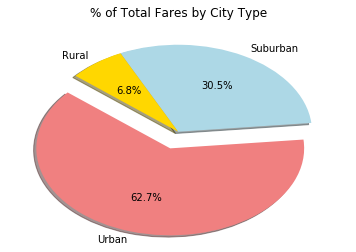

In [5]:
# Calculate Type Percents. Create sum groupby by city, then sum values in fare columns

Urban_sum = Urban_city_rides.groupby('city').sum()
Urban_fare_total = Urban_sum["fare"].sum()
Urban_fare_total

Suburban_sum = Suburban_city_rides.groupby('city').sum()
Suburban_fare_total = Suburban_sum["fare"].sum()
Suburban_fare_total

Rural_sum = Rural_city_rides.groupby('city').sum()
Rural_fare_total = Rural_sum["fare"].sum()
Rural_fare_total


# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [Urban_fare_total, Suburban_fare_total, Rural_fare_total]
colors = ["lightcoral", "lightblue", "gold"]
explode =(.2, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("% of Total Fares by City Type")

# Save Figure
plt.savefig("../KimPyber/TotFareByCity.png")

In [11]:
# Show Figure
plt.show()


## Total Rides by City Type

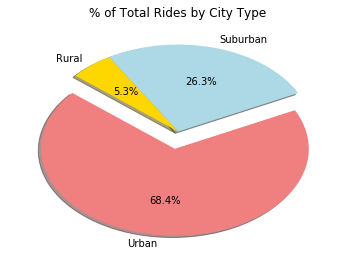

In [6]:
# Calculate Ride Percents
Urban_ride_total = Urban_totals["ride_id"].sum()
Urban_ride_total

Suburban_ride_total = Suburban_totals["ride_id"].sum()
Suburban_ride_total

Rural_ride_total = Rural_totals["ride_id"].sum()
Rural_ride_total

Urban_city_driver

# Build Pie Chart
title = "% of Total Rides by City Type"
labels = ["Urban", "Suburban", "Rural"]
sizes = [Urban_ride_total, Suburban_ride_total, Rural_ride_total]
colors = ["lightcoral", "lightblue", "gold"]
explode =(.2, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title ("% of Total Rides by City Type")


# Save Figure
plt.savefig("../KimPyber/TotRideByCity.png")

In [13]:
# Show Figure 
plt.show()


## Total Drivers by City Type

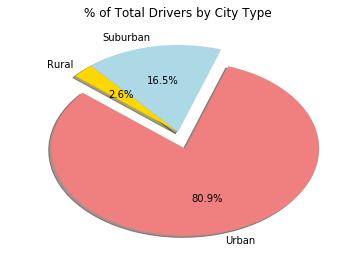

In [7]:
# Calculate Driver Percents
# Calculate Ride Percents
Urban_driver_total = Urban_city_driver["driver_count"].sum()
Urban_driver_total

Suburban_driver_total = Suburban_city_driver["driver_count"].sum()
Suburban_driver_total

Rural_driver_total = Rural_city_driver["driver_count"].sum()
Rural_driver_total


# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
sizes = [Urban_driver_total, Suburban_driver_total, Rural_driver_total]
colors = ["lightcoral", "lightblue", "gold"]
explode =(.2, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../KimPyber/TotDriverByCity.png")

In [15]:
# Show Figure
plt.show()